# 像NumPy一样使用TensorFlow 

## 张量和操作 Tensors and Operations

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

np.random.seed(42)
tf.random.set_seed(42)

### 张量 Tensors

使用`tf.constant()`创建张量

In [2]:
t = tf.constant([
    [[1,2,3],[4,5,6],[7,8,9]],
    [[10,11,12],[13,14,15],[16,11,12]],
])
t

<tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 11, 12]]], dtype=int32)>

In [3]:
t.shape, t.dtype

(TensorShape([2, 3, 3]), tf.int32)

### 索引 indexing

In [4]:
t[:, 1:]

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 4,  5,  6],
        [ 7,  8,  9]],

       [[13, 14, 15],
        [16, 11, 12]]], dtype=int32)>

In [5]:
t[..., 1, tf.newaxis]  
# … 代表多个维度上的切片 
# tf.newaxis  增加维度

<tf.Tensor: shape=(2, 3, 1), dtype=int32, numpy=
array([[[ 2],
        [ 5],
        [ 8]],

       [[11],
        [14],
        [11]]], dtype=int32)>

### 操作 ops

In [6]:
t + 10   # tf.add(t, 10)

<tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
array([[[11, 12, 13],
        [14, 15, 16],
        [17, 18, 19]],

       [[20, 21, 22],
        [23, 24, 25],
        [26, 21, 22]]], dtype=int32)>

In [7]:
tf.square(t)

<tf.Tensor: shape=(2, 3, 3), dtype=int32, numpy=
array([[[  1,   4,   9],
        [ 16,  25,  36],
        [ 49,  64,  81]],

       [[100, 121, 144],
        [169, 196, 225],
        [256, 121, 144]]], dtype=int32)>

In [8]:
t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t @ tf.transpose(t)   # t*(t^T)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

在tf中可以找到所有的基本数学运算和`Numpy`中的大多数运算.其中,某些名称与`Numpy`中有所不同:
- `tf.reduce_mean()` ~ `np.mean()`
- `tf.reduce_sum()` ~ `np.sum()`
- `tf.reduce_max()` ~ `np.max()`
- `tf.math.log()` ~ `np.log()`

- 理解`reduce`

    维度是用来索引一个多维数组中某个具体数所需要最少的坐标.`axis`是多维数组每个维度的坐标.`reduce`可以解释为“塌缩”,即`掉一层方括号`.

    对于$k$维的，`tf.reduce_sum(x, axis=k-1)`的结果是对**最里面一维所有元素**进行求和。`tf.reduce_sum(x, axis=k-2)`是对**倒数第二层里的向量对应的元素**进行求和。`tf.reduce_sum(x, axis=k-3)`把**倒数第三层的每个向量对应元素**相加。


<img src="./images/other/12-1.png" width="700">

### Keras 的底层API

`kerar API`在`keras.backend`中有自己的底层API.如果要编写可移植到其他`Keras`实现的代码,应当使用这些函数.

In [9]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [10]:
from tensorflow import keras
K = keras.backend
K.square(K.transpose(t)) + 10

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[11., 26.],
       [14., 35.],
       [19., 46.]], dtype=float32)>

##  张量和NumPy 

张量可以与Numpy配合使用.NumPy默认精度为`float64`, TensorFlow默认精度为`float32`

In [11]:
a = np.array([2., 3., 4.])
tf.constant(a, dtype=np.float32)   # 从Numpy中创建张量时,注意要设置dtype

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [12]:
t.numpy()  

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [13]:
tf.square(a)   # 将TensorFlow操作应用于Numpy数组.

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4.,  9., 16.])>

In [14]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

## 类型转换 Type Conversions

类型转换会严重影响性能,并且在自动完成转换时很容易被忽视.因此在TensorFlow不会自动执行任何类型转换.

In [15]:
try:
    tf.constant(2.0) + tf.constant(1)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


当你确实需要使用类型转换时,使用`tf.cast()`

In [16]:
t2 = tf.constant(40., dtype=tf.float64)
tf.constant(2.0) + tf.cast(t2, dtype=tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

## 变量 Variables

In [17]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

使用`assign()`给变量添加或减少变值,或通过切片的方法修改某个单元格的值.

In [18]:
v.assign(v*2)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [19]:
v[0, 1].assign(42)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [20]:
v[:, 2].assign([0., 1.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 2., 42.,  0.],
       [ 8., 10.,  1.]], dtype=float32)>

使用`scatter_nd_update()`修改某个单元格的值.

In [21]:
v.scatter_nd_update(indices=[[0,0], [1,2]],
                    updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [  8.,  10., 200.]], dtype=float32)>

事实上,几乎不需要手动创建变量,因为keras提供了`add_weight()`方法来解决问题.并且模型参数通常由优化器直接更新.

## 其他数据结构 Other Data Structures

### 字符串 Strings

张量可以容纳字符串,如果使用`Unicode`字符串创建一个张量,则会自动将其编码成`UTF-8`.

In [22]:
tf.constant("hello world!")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world!'>

In [23]:
u = tf.constant("你好 世界!")
u

<tf.Tensor: shape=(), dtype=string, numpy=b'\xe4\xbd\xa0\xe5\xa5\xbd \xe4\xb8\x96\xe7\x95\x8c!'>

In [24]:
tf.strings.length(u, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=6>

操作包含多个字符串的张量:

In [25]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])

tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

# 定制模型和训练算法 Customizing Models and Training Algorithms

以加州房价数据集为例加载数据集,并创建训练集,验证集以及测试集,并将其输入标准化.

In [26]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
housing = fetch_california_housing()
X = housing.data
y = housing.target
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## 自定义损失函数  Custom Loss Functions

**Huber损失函数** 整合了`平均绝对误差MAE`和`均方误差MSE`各自的优点, 并避免其缺点.

$$
L_{\delta}(y, f(x))=\left\{\begin{array}{cc}
\frac{1}{2}(y-f(x))^{2} & |y-f(x)| \leq \delta \\
\delta|y-f(x)|-\frac{1}{2} \delta^{2} & \text { otherwise }
\end{array}\right.
$$

- $\delta$ 是Huber的一个超参数, 当真实值和预测值的差值 $|y-f(x)| \leq \delta$ 时, `Huber`就是`MSE`; 当差值在 $(-\infty, \delta)$ 或者 $(\delta,+\infty)$ 时, `Huber`就是`MAE`。
- 因此, 当误差较大时, 使用`MAE`对离群点不那么敏感; 在误差较小时使用`MSE`, 能够快速的收敛;
- 使用`MAE`训练神经网络最大的一个问题就是不变的大梯度，这可能导致在使用梯度下降快要结束时，错过了最小点。而对于`MSE`，梯度会随着损失的减小而减小，使结果更加精确。在这种情况下，`Huber`损失就非常有用。它会由于梯度的减小而落在最小值附近。比起`MSE`，它对异常点更加鲁棒。
- 因此，`Huber`损失结合了`MSE`和`MAE`的优点。但是，`Huber`损失的问题是我们可能需要不断调整超参数𝛿 .



In [28]:
# tf.where():condition返回相对应的X或Y值
# 若condition=True,则返回对应X的值，False则返回对应的Y值。

def huber(y_true, y_pred, delta=1.):
    error = y_true - y_pred
    MSE = tf.square(error) / 2
    MAE = (delta * tf.abs(error)) - (tf.square(delta) / 2)
    
    condition = tf.abs(error) <= delta
    
    return tf.where(condition=condition, x=MSE, y=MAE)

- 绘制损失函数

In [29]:
import matplotlib.pyplot as plt

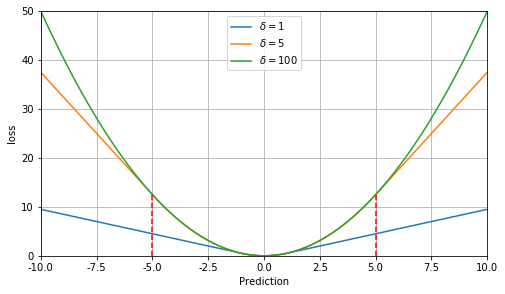

In [30]:
plt.figure(figsize=(8, 4.5))
z = np.linspace(-10 ,10, 200)
plt.plot(z, huber(0,z,1), label="$\delta=1$")
plt.plot(z, huber(0,z,5), label="$\delta=5$")
plt.plot(z, huber(0,z,100), label="$\delta=100$")

plt.plot([5,5], [0, huber(0.,5.,5.)], "r--")
plt.plot([-5,-5], [0, huber(0.,-5.,5.)], "r--")

plt.axis([-10,10,0,50])
plt.grid(True)
plt.xlabel('Prediction')
plt.ylabel('loss')
plt.legend()

plt.show()

- 建立编译训练模型

In [31]:
input_shape = X_train.shape[1:]   # (8,)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss=huber,
              optimizer=optimizer,
              metrics=[keras.metrics.mean_absolute_error])

model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 2s 3ms/step - loss: 0.6235 - mean_absolute_error: 0.9953 - val_loss: 0.2862 - val_mean_absolute_error: 0.5866
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2197 - mean_absolute_error: 0.5177 - val_loss: 0.2382 - val_mean_absolute_error: 0.5281


## 保存并加载含有自定义组件的模型 Saving and Loading Models That Contain Custom Components

In [32]:
model.save("./models/custom_loss.h5")

In [33]:
# 当加载含有自定义对象的模型时, 需要将名称映射到对象
model = keras.models.load_model("./models/custom_loss.h5",
                                custom_objects={"huber":huber})

In [34]:
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled, y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2054 - mean_absolute_error: 0.4982 - val_loss: 0.2209 - val_mean_absolute_error: 0.5050
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1999 - mean_absolute_error: 0.4900 - val_loss: 0.2127 - val_mean_absolute_error: 0.4986


### 解决阈值𝛿 的设置问题

1. 创建函数,该函数创建已配置的损失函数.

In [35]:
def create_huber(delta=1.):
    def huber(y_true, y_pred):
        error = y_true - y_pred
        MSE = tf.square(error) / 2
        MAE = (delta * tf.abs(error)) - (tf.square(delta) / 2)

        condition = tf.abs(error) <= delta

        return tf.where(condition=condition, x=MSE, y=MAE) 
    return huber

- 当保存模型时阈值不会被保存,这意味着每次加载模型都需要指定阈值.

In [36]:
model = keras.models.load_model("./models/custom_loss.h5",
                                custom_objects={"huber":create_huber(delta=5.0)})

In [37]:
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2426 - mean_absolute_error: 0.5038 - val_loss: 0.3431 - val_mean_absolute_error: 0.5047
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2323 - mean_absolute_error: 0.4962 - val_loss: 0.2694 - val_mean_absolute_error: 0.4929


2. 通过创建`keras.losses.Loss`类的子类,实现其`get_config()`

In [38]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, delta=1., **kwargs):
        self.delta = delta
        super(HuberLoss, self).__init__(**kwargs)   # super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        MSE = tf.square(error) / 2
        MAE = (self.delta * tf.abs(error)) - (tf.square(self.delta) / 2)
        condition = tf.abs(error) <= self.delta
        return tf.where(condition=condition, x=MSE, y=MAE) 
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "delta":self.delta}    

- 构造函数接受` **kwargs`并将它们传递给父类构造函数,该父类构造函数处理标准超参数:损失的`name`和用于聚合单个实例损失的`reduction`算法。默认情况下它是`sum_over_batch_size`,这意味着损失将是实例损失的总和,由样本重(如果有)加权,再除以批量大小(而不是权重之和,因此不是权重的平均).
- `ca11()`方法获取标签和顶测,计算所有实例损失,然后将其返回, 
- `get_config()`方法返回一个字典,将每个超参数名称映射到其值。它首先调用父类的`get_config()`方法,然后将新的超参数添加到此字典中.

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss=HuberLoss(delta=2.),
              optimizer=optimizer,
              metrics=[keras.metrics.mean_absolute_error])

model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.7095 - mean_absolute_error: 0.8863 - val_loss: 0.3378 - val_mean_absolute_error: 0.5485
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2416 - mean_absolute_error: 0.5083 - val_loss: 0.2660 - val_mean_absolute_error: 0.5089


In [40]:
model.save("./models/custom_loss_2.h5")

- 当保存模型时,阈值会同时被保存!当保存模型时, `Keras`会调用损失实例的`get_config()`方法,并将配置以`JSON`格式保存到`HDFS文件`中。

- 加载模型时,它在`HuberLoss类`上调用`from_config()`类方法:此方法由基类(Loss)实现,并创建该类的实例,并将`**config`传递给构造函数.

In [41]:
model = keras.models.load_model("./models/custom_loss_2.h5",
                                custom_objects={"HuberLoss":HuberLoss})

In [42]:
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.2286 - mean_absolute_error: 0.4970 - val_loss: 0.2120 - val_mean_absolute_error: 0.4723
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2216 - mean_absolute_error: 0.4904 - val_loss: 0.2045 - val_mean_absolute_error: 0.4725


In [43]:
model.loss.delta

2.0

## 自定义激活函数,初始化,正则化和约束

> 1. Softplus函数:
$$
softplus(x) = log(1+e^x)
$$
2. Glorot初始化:
若采用高斯分布来随机初始化参数，连接权重 $𝑤(𝑙)$ 可以按 $𝒩 (0, \frac{2}{M_{l-1}\  + M_{l}} )$
的分布进行初始化.
3. $\ell_1$ 正则化:
$$
C||w||_1
$$

In [44]:
# ~keras.activations.softplus()
def my_softplus(x):
    return tf.math.log(1.0 + tf.exp(x))

# ~keras.initializers.glorot_normal()
def my_glorot_normal(shape, dtype=tf.float32):
    # 标准差
    stddev = tf.sqrt(2. / (shape[0]+shape[1]))
    return tf.random.normal(shape=shape, stddev=stddev, dtype=dtype)

# ~keras.regularizers.l1(0.01)
def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01*weights))

# ~keras.constraints.non_neg()  确保权重均为正
def my_positive_weight(weights):
    return tf.where(condition=weights<0.,
                    x=tf.zeros_like(weights),   # 生成全0数组
                    y=weights)

In [45]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1,activation=my_softplus,
                       kernel_initializer=my_glorot_normal,
                       kernel_regularizer=my_l1_regularizer,
                       kernel_constraint=my_positive_weight)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss="mse",
              optimizer=optimizer,
              metrics=[keras.metrics.mean_absolute_error])

model.fit(X_train_scaled, y_train,
          epochs=4,
          validation_data=(X_val_scaled,y_val))

Epoch 1/4
363/363 [==============================] - 1s 1ms/step - loss: 1.3809 - mean_absolute_error: 0.8429 - val_loss: inf - val_mean_absolute_error: inf
Epoch 2/4
363/363 [==============================] - 0s 1ms/step - loss: 0.6669 - mean_absolute_error: 0.5528 - val_loss: 2.7498 - val_mean_absolute_error: 0.5489
Epoch 3/4
363/363 [==============================] - 0s 1ms/step - loss: 0.5601 - mean_absolute_error: 0.5104 - val_loss: 1.8447 - val_mean_absolute_error: 0.5116
Epoch 4/4
363/363 [==============================] - 0s 1ms/step - loss: 0.5204 - mean_absolute_error: 0.4949 - val_loss: 1.3956 - val_mean_absolute_error: 0.4966


- 保存和加载模型

In [46]:
model.save("./models/custom_loss_3.h5")

In [47]:
model = keras.models.load_model("./models/custom_loss_3.h5",
                                custom_objects={
                                    'my_softplus': my_softplus,
                                    'my_glorot_normal':my_glorot_normal,
                                    'my_l1_regularizer':my_l1_regularizer,
                                    'my_positive_weight':my_positive_weight
                                })

- 对于函数需要与模型一起保存的超参数,需要继承适当的类.

In [48]:
# def my_l1_regularizer(weights):
#     return tf.reduce_sum(tf.abs(0.01*weights))


class my_l1_reg(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor*weights))
    def get_config(self):
        return {"factor":self.factor}

注意:
1. 为**损失函数,层(包括激活函数),模型**实现**`call()`**方法.
2. 为**正则化,初始化,约束**实现**`__call()__`**方法.

## 自定义指标 Custom Metrics

在大多数情况下,定义一个自定义指标函数与定义一个自定义损失函数**完全相同**.

In [49]:
# 以前面的自定义损失函数Huber()作为指标函数
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

model.compile(loss=keras.losses.mean_squared_error,
              optimizer=optimizer,
              metrics=[create_huber(delta=2.)])

model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 0.8157 - huber: 0.3689 - val_loss: 0.4798 - val_huber: 0.2252
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.4678 - huber: 0.2292 - val_loss: 0.9202 - val_huber: 0.2418


### 流式度量 Streaming metrics

对于训练期间的每一批次, `Keras`都会计算该指标并跟踪**自轮次开始以来的均值**。

- 以二元分类器的`精确率`为例.
$$
P = \frac{TP}{TP+FP}
$$

    假设该模型在第一批次中做出了5个正预测,其中4个是正确的,即80%的精度。然后假设该模型在第二批次中做出了3个正预测,但它们都是不正确的,即第二批次的精度为0%。如果仅计算这两个精度的均值,则可以得到40%。实际上,在8个正预测(5+3)中,总共有4个真正(4+0),因此总体精度为 50%,而不是40%。
    
    我们需要的是一个对象,该对象可以跟踪真正的数量和假正的数量并且可以在请求时计算其比率。

In [50]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [51]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

- 手动创建流式度量-方法1

    跟踪Huber总损失, 当要求返回结果时返回比率,得到平均Huber损失

In [52]:
class HuberMetric(keras.metrics.Metric):
    def __init__(self, delta=1., **kwargs):
        super(HuberMetric, self).__init__(**kwargs)
        self.delta = delta
        self.Huber = create_huber(delta)
        self.total = self.add_weight("total", initializer=tf.zeros)
        self.count = self.add_weight("count", initializer=tf.zeros)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metrics = self.Huber(y_true, y_pred)
        # 对于变量应该使用assign()方法
        self.total.assign_add(tf.reduce_sum(metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), dtype=tf.float32))  # int -> float32

    def result(self):
        return self.total / self.count

    def get_config(self):
        base_config = super(HuberMetric, self).get_config()
        return {**base_config, 'delta': self.delta}


1. `add_weight()`创建用于跟踪多个批次的度量状态所需的变量.
2. 当你使用度量作为函数时,首先调用`update_state()`,然后调用`result()`,并返回输出.
3. 某些指标(如精确度)不能简单的按批次平均,这种情况下应该使用流式度量.

- 测试

In [53]:
y_true = tf.constant([
    [0.],
    [5.]
])
y_pred = tf.constant([
    [1.],
    [9.25]
])

$$
L_{\delta}(y, f(x))=\left\{\begin{array}{cc}
\frac{1}{2}(y-f(x))^{2} & |y-f(x)| \leq \delta \\
\delta|y-f(x)|-\frac{1}{2} \delta^{2} & \text { otherwise }
\end{array}\right.\\
$$

解:
$$
error_1 = |\text{y_true}_1- \text{y_pred}_1| = |0-1|=1 < \delta \\
error_2 = |5-9.25|=4.25 > \delta \\
total_1 = L_{\delta=2.}(error_1)=\frac{1}{2}(error_1)^{2}= \frac{1}{2}  \\
total_2 = L_{\delta=2.}(error_2)=\delta|error|-\frac{1}{2} \delta^{2}=8.5 - 2 = 6.5 \\
total = total_1+total_2 = 7 \\
count = 2 \\
result = \frac{7}{2} = 3.5
$$

In [54]:
test = HuberMetric(delta=2.)
test(y_true, y_pred)
test.result()

<tf.Tensor: shape=(), dtype=float32, numpy=3.5>

In [55]:
test.variables    # 查看变量

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=7.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=2.0>]

In [56]:
test.reset_states()  # 重置变量
test.variables

[<tf.Variable 'total:0' shape=() dtype=float32, numpy=0.0>,
 <tf.Variable 'count:0' shape=() dtype=float32, numpy=0.0>]

- 在模型上进行测试

In [57]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=create_huber(delta=2.),
              metrics=[HuberMetric(delta=2.)])
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),  # float64->float32
          epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.3016 - huber_metric_1: 0.3016
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.2305 - huber_metric_1: 0.2305


In [58]:
model.save("./models/custom_metrics.h5")

model = keras.models.load_model("./models/custom_metrics.h5",
                                custom_objects={
                                    "huber":create_huber(delta=1.),
                                    "HuberMetric":HuberMetric           # 已保存阈值
                                })
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),  # float64->float32
          epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1829 - huber_metric_1: 0.2068
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1775 - huber_metric_1: 0.2004


In [59]:
model.metrics[-1].delta    # 注意是在[-1]访问HuberMetric

2.0

- 手动创建流式度量-方法2

In [60]:
class HuberMetric(keras.metrics.Mean):
    def __init__(self, delta=1., name='HuberMetric', dtype=None, **kwargs):
        self.delta = delta
        self.Huber = create_huber(delta)
        super(HuberMetric, self).__init__(name=name, dtype=dtype)

    def update_state(self, y_true, y_pred, sample_weight=None):
        metrics = self.Huber(y_true, y_pred)
        super(HuberMetric, self).update_state(metrics, sample_weight)

    def get_config(self):
        base_config = super(HuberMetric, self).get_config()
        return {**base_config, 'delta': self.delta}

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=create_huber(delta=2.),
              metrics=[HuberMetric(delta=2.)])

In [62]:
sample_weight = np.random.rand(len(y_train))
history = model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),
                    epochs=2, sample_weight=sample_weight)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1643 - HuberMetric: 0.3337
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1125 - HuberMetric: 0.2264


In [63]:
history.history["loss"][0], history.history["HuberMetric"][0] * sample_weight.mean()

(0.1643054336309433, 0.16561566126645977)

In [64]:
model.save("./models/custom_metrics_v2.h5")

model = keras.models.load_model("./models/custom_metrics_v2.h5",
                                custom_objects={
                                    "huber":create_huber(delta=1.),
                                    "HuberMetric":HuberMetric           # 已保存阈值
                                })
model.fit(X_train_scaled.astype(np.float32), y_train.astype(np.float32),  # float64->float32
          epochs=2)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.1900 - HuberMetric: 0.2179
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.1798 - HuberMetric: 0.2041


In [65]:
model.metrics[-1].delta    # 注意是在[-1]访问HuberMetric

2.0

## 自定义层  Custom Layers

如果想要构建一个包含独特层的架构,而`Tensorflow`没有为其提供默认实现的情况下,你将需要创建一个自定义层。或者你可能只是想构建一个重复的架构,其中包含重复多次的相同层块,因此将每个层块视为一个层会很方便。

###  Lambda层

对于创建无权重的层,如`Flatten`,`ReLU`等的简单应用,可以使用<mark>匿名函数层Lambda<mark>

In [66]:
# 对层的输入应用指数函数
exp_layer = keras.layers.Lambda(lambda x:tf.exp(x))

exp_layer([-1., 0., 1.])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.36787945, 1.        , 2.7182817 ], dtype=float32)>

当要预测的值具有非常不同的标度(例如0.01,10,1000)时,有时会在回归模型的输出层中使用指数层.

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.relu,
                       input_shape=input_shape),
    keras.layers.Dense(1),
    exp_layer
])

model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss=keras.losses.mean_absolute_error,)

model.fit(X_train_scaled, y_train, epochs=5,
          validation_data=(X_val_scaled, y_val))

model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 0.8267 - val_loss: 0.4922
Epoch 2/5
363/363 [==============================] - 0s 772us/step - loss: 0.4786 - val_loss: 0.4448
Epoch 3/5
363/363 [==============================] - 0s 667us/step - loss: 0.4560 - val_loss: 0.4267
Epoch 4/5
363/363 [==============================] - 0s 669us/step - loss: 0.4471 - val_loss: 0.4232
Epoch 5/5
162/162 [==============================] - 0s 496us/step - loss: 0.4321


0.43210428953170776

### 自定义层

对于带有训练参数的：比如`Dense层`、`Conv2D层`，等等，我们在训练的过程中需要训练层的权重和偏置项

In [68]:
class MyDense(keras.layers.Layer):
    def __init__(self, n_neurons, activation=None, **kwargs):
        super(MyDense, self).__init__(**kwargs)
        self.n_neurons = n_neurons
        self.activation = keras.activations.get(activation)  # 接受函数或标准字符串("relu")

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(
            name="kernel", shape=[batch_input_shape[-1], self.n_neurons],
            initializer=keras.initializers.glorot_normal)
        self.bias = self.add_weight(
            name="bias", shape=[self.n_neurons],
            initializer=tf.zeros)
        # 必须在最后调用父类的build()
        super(MyDense, self).build(batch_input_shape)

    def call(self, X):
        # 计算输入X与层内核的矩阵乘积,添加偏置向量,并对结果应用激活函数,从而获得层的输出。
        return self.activation(X @ self.kernel + self.bias)

    def compute_output_shape(self, batch_input_shape):
        # 仅返回该层输出的形状:最后一个维度被替换为该层中神经元数量
        # as_list()转换为python列表
        return tf.TensorShape(batch_input_shape.as_list()[:-1] + [self.n_neurons])

    def get_config(self):
        base_config = super(MyDense, self).get_config()
        return {**base_config, "n_neurons": self.n_neurons, 
                "activation": keras.activations.serialize(self.activation)}

- `bui1d()`: 通过为每个权重调用`add_weight()`来创建层的变量。首次使用该层时,将调用`build()`。在方法的最后(并且仅在最后),你必须调用父类的bui1d()方法:这告诉 Keras这一层被构建了(它只是设置了self.built=True)。
- 在`tf.keras`中,形状是`tf.Tensorshape类`的实例,你可以使用`as_list()`将其转换为 Python列表。
- `get_config()`方法就像以前的自定义类中一样。请注意我们通过调用 `keras.activations.serialize()`保存激活函数的完整配置。

In [69]:
model = keras.models.Sequential([
    MyDense(30, activation="relu", input_shape=input_shape),
    MyDense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 0.6651 - val_loss: 0.5982
Epoch 2/2
162/162 [==============================] - 0s 617us/step - loss: 0.4121


0.41214150190353394

In [70]:
model.save("./models/custom_layers.h5")

model = keras.models.load_model("./models/custom_layers.h5",
                                custom_objects={
                                    "MyDense":MyDense,
                                })
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 899us/step - loss: 0.4366 - val_loss: 0.3798
Epoch 2/2
363/363 [==============================] - 0s 654us/step - loss: 0.3958 - val_loss: 1.0223


### 多输入多输出层

假设这个层需要两个输入并返回两个输出`call()`应返回输出列表,`compute_output_shape()`应返回批处理输出的形状列表.

In [71]:
class MyMultiLayer(keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape: ", X1.shape ," X2.shape: ", X2.shape) # Debugging of custom layer
        return X1 + X2, X1 * X2

    def compute_output_shape(self, batch_input_shape):
        batch_input_shape1, batch_input_shape2 = batch_input_shape
        return [batch_input_shape1, batch_input_shape2]

只能使用函数式和子类API,不能使用顺序API.注意:call()方法接收符号输入,其形状仅部分指定(因此一个维度为None)
    
使用以下方法调用自定义层:

In [72]:
inputs1 = keras.layers.Input(shape=[2])
inputs2 = keras.layers.Input(shape=[2])
outputs1, outputs2 = MyMultiLayer()((inputs1, inputs2))

X1.shape:  (None, 2)  X2.shape:  (None, 2)


- 实例测试
    1. 首先将每个数据集的输入(8个特征)分成两部分，每个部分有四个特征

In [73]:
def spilt_feature(data):
    feature_count = data.shape[-1]    # 8
    spilt_half = feature_count // 2  
    return data[:, :spilt_half], data[:, spilt_half:]


X_train_scaled_A, X_train_scaled_B = spilt_feature(X_train_scaled)
X_val_scaled_A, X_val_scaled_B = spilt_feature(X_val_scaled)
X_test_scaled_A, X_test_scaled_B = spilt_feature(X_test_scaled)

X_train_scaled_A.shape, X_train_scaled_B.shape

((11610, 4), (11610, 4))

In [74]:
# 测试下输入的形状
outputs1, outputs2 = MyMultiLayer()([X_train_scaled_A, X_train_scaled_B])

X1.shape:  (11610, 4)  X2.shape:  (11610, 4)


2. 使用函数式API构建模型

In [75]:
keras.backend.clear_session()

In [76]:
input_A = keras.layers.Input(shape=X_train_scaled_A.shape[-1])
input_B = keras.layers.Input(shape=X_train_scaled_B.shape[-1])

Multi_1, Multi_2 = MyMultiLayer()([input_A, input_B])
hidden_1 = keras.layers.Dense(30, activation=keras.activations.relu)(Multi_1)
hidden_2 = keras.layers.Dense(30, activation=keras.activations.relu)(Multi_2)

concat = keras.layers.Concatenate()([hidden_1, hidden_2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

X1.shape:  (None, 4)  X2.shape:  (None, 4)


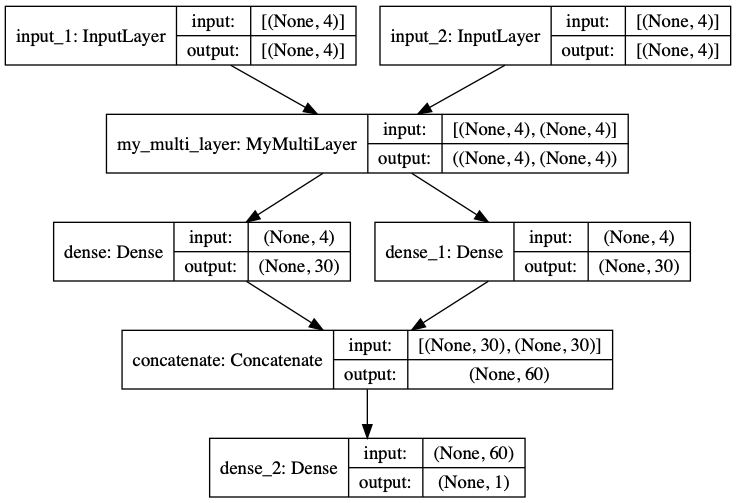

In [77]:
keras.utils.plot_model(model, './models/Multi_custom_layers.png', show_shapes=True)

In [78]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
model.fit([X_train_scaled_A, X_train_scaled_B], y_train,
          epochs=2,
          validation_data=([X_val_scaled_A, X_val_scaled_B],y_val))
model.evaluate([X_test_scaled_A, X_test_scaled_B], y_test)

Epoch 1/2
X1.shape:  (None, 4)  X2.shape:  (None, 4)
X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 [==============================] - 1s 931us/step - loss: 1.1911 - val_loss: 69.6531
Epoch 2/2
162/162 [==============================] - 0s 480us/step - loss: 0.7968


0.7968457341194153

In [79]:
model.save("./models/Multi_custom_layers.h5")

model = keras.models.load_model("./models/Multi_custom_layers.h5",
                                custom_objects={"MyMultiLayer":MyMultiLayer})
model.fit([X_train_scaled_A, X_train_scaled_B], y_train,
          epochs=2,
          validation_data=([X_val_scaled_A, X_val_scaled_B],y_val))

X1.shape:  (None, 4)  X2.shape:  (None, 4)
Epoch 1/2
X1.shape:  (None, 4)  X2.shape:  (None, 4)
363/363 [==============================] - 1s 916us/step - loss: 0.9767 - val_loss: 36.5446
Epoch 2/2
363/363 [==============================] - 0s 705us/step - loss: 1.6611 - val_loss: 201.5465


### 测试与训练期间行为不同的层

在训练和测试阶段行为差距较大的层，常用的有：`Drouout层`、`BatchNormalization层`,则必须将训练参数添加到`call()`并使用此参数来决定要做什么.

以在训练期间添加高斯噪音,但在测试期间不执行任何操作的层为例:

In [80]:
class AddGaussianNoise(keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super(AddGaussianNoise, self).__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(shape=tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_size):
        return batch_input_size

    def get_config(self):
        base_config = super(AddGaussianNoise, self).get_config()
        return {**base_config, "stddev": self.stddev}

In [81]:
model = keras.models.Sequential([
    AddGaussianNoise(stddev=1.),
    keras.layers.Dense(30, activation=keras.activations.selu,
                       kernel_initializer=keras.initializers.lecun_normal,
                       input_shape=input_shape),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 903us/step - loss: 1.2363 - val_loss: 1.1476
Epoch 2/2
162/162 [==============================] - 0s 458us/step - loss: 0.6875


0.6874946355819702

In [82]:
model.save("./models/GaussianNoise_custom_layers.h5")

model = keras.models.load_model("./models/GaussianNoise_custom_layers.h5",
                                custom_objects={"AddGaussianNoise":AddGaussianNoise})
model.fit(X_train_scaled, y_train,
          epochs=2,
          validation_data=(X_val_scaled,y_val))

Epoch 1/2
363/363 [==============================] - 1s 793us/step - loss: 0.9963 - val_loss: 0.8085
Epoch 2/2
363/363 [==============================] - 0s 622us/step - loss: 0.9926 - val_loss: 3.2317


## 自定义模型 Custom Models

自定义以下模型:具有自定义`残差网络ResidualBlock层`(包括跳过连接)的任意模型

<img src="./images/other/12-2.png" width="400">

输入经过第一个密集层,然后经过由两个密集层组成的残差块并执行加法运算,然后经过相同的残差块3次或者更多次,然后通过第二个残差块,最终结果通过密集输出层。

要实现此模型,最好首先创建一个`Residualblock层`,因为我们将创建几个相同的块,并且我们可能想在另一个模型中重用它.

In [83]:
class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super(ResidualBlock, self).__init__(**kwargs)
        self.hidden = [keras.layers.Dense(units=n_neurons, activation=keras.activations.elu,
                                          kernel_initializer=keras.initializers.he_normal)
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return Z + inputs

### 使用子类API定义模型

In [84]:
class ResidualRegressor(keras.models.Model):
    def __init__(self, output_dim, **kwargs):
        super(ResidualRegressor, self).__init__(**kwargs)
        self.hidden = keras.layers.Dense(30, activation=keras.activations.elu,
                                         kernel_initializer=keras.initializers.he_normal)
        self.ResidualBlock_1 = ResidualBlock(n_layers=2, n_neurons=30)
        self.ResidualBlock_2 = ResidualBlock(n_layers=2, n_neurons=30)
        self.output_dim = output_dim
        self.outputLayer = keras.layers.Dense(self.output_dim)

    def call(self, inputs):
        Z = self.hidden(inputs)
        for _ in range(4):  # 执行一次后再循环3次
            Z = self.ResidualBlock_1(Z)
        Z = self.ResidualBlock_2(Z)
        out = self.outputLayer(Z)
        return out

In [85]:
model = ResidualRegressor(output_dim=1)

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
history = model.fit(X_train_scaled, y_train,
                    epochs=5,
                    validation_data=(X_val_scaled,y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 2.8833 - val_loss: 56.5210
Epoch 2/5
363/363 [==============================] - 0s 924us/step - loss: 1.7952 - val_loss: 29.5267
Epoch 3/5
363/363 [==============================] - 0s 939us/step - loss: 1.2363 - val_loss: 390.2773
Epoch 4/5
363/363 [==============================] - 0s 965us/step - loss: 1.9080 - val_loss: 1341.6788
Epoch 5/5
162/162 [==============================] - 0s 549us/step - loss: 0.7844


0.7844001054763794

- 保存加载模型

In [86]:
model.save("./models/custom_model.ckpt")   # tensorflow模型格式!

model = keras.models.load_model("./models/custom_model.ckpt")
history = model.fit(X_train_scaled, y_train,
                    epochs=5,
                    validation_data=(X_val_scaled,y_val))
model.evaluate(X_test_scaled, y_test)

INFO:tensorflow:Assets written to: ./models/custom_model.ckpt/assets


INFO:tensorflow:Assets written to: ./models/custom_model.ckpt/assets


Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 0.9922 - val_loss: 5.5694
Epoch 2/5
363/363 [==============================] - 0s 991us/step - loss: 0.4360 - val_loss: 2.0670
Epoch 3/5
363/363 [==============================] - 0s 976us/step - loss: 0.4071 - val_loss: 0.4977
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.3685 - val_loss: 0.5279
Epoch 5/5
162/162 [==============================] - 0s 627us/step - loss: 0.3530


0.3530058264732361

###   使用顺序API定义模型

In [87]:
block_1 = ResidualBlock(n_layers=2, n_neurons=30)
block_2 = ResidualBlock(n_layers=2, n_neurons=30)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation=keras.activations.elu,
                       kernel_initializer=keras.initializers.he_normal),
    block_1, block_1, block_1, block_1,
    block_2,
    keras.layers.Dense(1)
])

In [88]:
optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
history = model.fit(X_train_scaled, y_train,
                    epochs=5,
                    validation_data=(X_val_scaled,y_val))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 0.8625 - val_loss: 208.8641
Epoch 2/5
363/363 [==============================] - 0s 815us/step - loss: 1.7035 - val_loss: 8.5288
Epoch 3/5
363/363 [==============================] - 0s 792us/step - loss: 0.5877 - val_loss: 14.5597
Epoch 4/5
363/363 [==============================] - 0s 797us/step - loss: 1.3039 - val_loss: 607.7425
Epoch 5/5
162/162 [==============================] - 0s 518us/step - loss: 0.3872


0.3872164189815521

## 基于模型内部的损失与指标 Losses and Metrics Based on Model Internals 

有时候我们可能要根据模型内部,如权重或隐藏层的激活来定义损失,这对于进行正则化或监视模型内部的某些方面可能很有用.
要基于模型内部定义自定义损失,根据所需模型的任何部分进行计算,然后将结果传递给`add_loss()`.

例: 构建一个自定义回归MLP模型,该模型由5个隐藏层和一个输出层的堆栈组成。在上部隐藏层的顶部有`辅助输出`.

与该辅助输出相关的损失称为`重建损失`:它是重建与输入之间的均方差。通过将这种重建损失添加到主要损失中,我们鼓励模型通过隐藏层保留尽可能多的信息, 即使对回归任务本身没有直接用处的信息。实际中,这种损失有时会提高泛化性(正则化损失).

<img src="./images/other/12-3.png" width="200">

In [89]:
class ReconstructingRegressor(keras.Model):
    def __init__(self, output_dim, **kwargs):
        super(ReconstructingRegressor, self).__init__(**kwargs)
        self.hidden = [keras.layers.Dense(30, activation=keras.activations.selu,
                                          kernel_initializer=keras.initializers.lecun_normal)
                       for _ in range(5)]
        self.outputLayer = keras.layers.Dense(output_dim)
        self.reconstruction_mean = keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = keras.layers.Dense(n_inputs)

    def call(self, inputs, training=None, mask=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
            
        return self.outputLayer(Z)

- 构造函数创建具有5个密集隐藏层和一个密集输出层的DNN。
- `build()`创建一个额外的密集层,该层用于重建模型的输入。必须在此处创建它,因为它的单元数必须等于输入数,并且在调用`build()`方法之前,此数是未知的。
- `call()`处理所有5个隐藏层的输入,然后将结果传递到重建层,从而产生重构。然后`call()`计算重建损失(重建与输入之间的均方差),并使用`add_loss`将其添加到模型的损失列表中。请注意,我们通过将其乘以0.05按比例缩小了重构,确保了重建损失不会再主要损失中占大部分.
- 它在构造函数中创建`keras.metrics.Mean()`，并在`call()`方法中使用它来跟踪平均重建损失。由于只在训练期间执行,因此向`call()`方法添加了一个训练参数，如果训练为True，那么我们将更新`reconstruction_mean`，并调用`self.add_metric`，以确保它正确显示。

In [90]:
model = ReconstructingRegressor(output_dim=1)

optimizer = keras.optimizers.Nadam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss=keras.losses.mean_squared_error)
history = model.fit(X_train_scaled, y_train,
                    epochs=2)
model.evaluate(X_test_scaled, y_test)

Epoch 1/2
363/363 [==============================] - 1s 759us/step - loss: 0.6228 - reconstruction_error: 0.4936
Epoch 2/2
162/162 [==============================] - 0s 499us/step - loss: 0.3804 - reconstruction_error: 0.0000e+00


[0.3803849220275879, 0.0]

## 使用自动微分计算梯度 Computing Gradients Using Autodiff

> 后续内容 等待补充!

## 自定义训练循环 Custom Training Loops

> 后续内容 等待补充!

# TensorFlow 函数与图 TensorFlow Functions and Graphs

##  TensorFlow 函数 TensorFlow Functions

In [91]:
# 计算输入的立方的简单函数
def cube(x):
    return x ** 3

In [92]:
# 使用张量来调用函数
cube(tf.constant(2.))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

- 将`Python函数`转化为`TensorFlow函数`

In [93]:
tf_cube = tf.function(cube)
tf_cube

In [94]:
tf_cube(2.)

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

在后台,`tf.function`分析了`cube()`执行的计算,并生成等效的计算图.

### TF函数和具体函数 TF Functions and Concrete Functions

> 后续内容 等待补充!

> Apotosome 12/13/21